<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análisis de experimentos
</h1>


# <font color='red' style='font-size: 30px;'> Introducción al análisis de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Insertando el experimento en un Dataframe </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando las bibliotecas

### Pandas

https://pandas.pydata.org/

In [96]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [97]:
import numpy as np

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Pruebas realizadas en forma normalizada</b></font></p>








<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construyendo una matriz representando todas las pruebas realizadas:


In [98]:
pruebas = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
pruebas

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [99]:
!pip install pyDOE2
import pyDOE2 as doe

## Construyendo un diseño factorial de 2²


In [100]:
pruebas = doe.ff2n(2)

In [101]:
pruebas

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Insertando el diseño en un Dataframe

In [102]:
experimento = pd.DataFrame(pruebas, columns=['Harina','Leche'])

In [103]:
experimento

,Harina,Leche
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Insertando la columna con los resultados

In [104]:
experimento['Cantidades'] = [19,37,24,49]

In [105]:
experimento

,Harina,Leche,Cantidades
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusión:</b> Finalmente tenemos nuestro experimento representado por un <i>Dataframe</i> de Pandas. Usaremos este <i>Dataframe</i> para comenzar el análisis de nuestro experimento.
<hr>   

# <font color = 'purple'> Analizando gráficamente el experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando Seaborn

https://seaborn.pydata.org

In [106]:
import seaborn as sns

In [107]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para la Harina

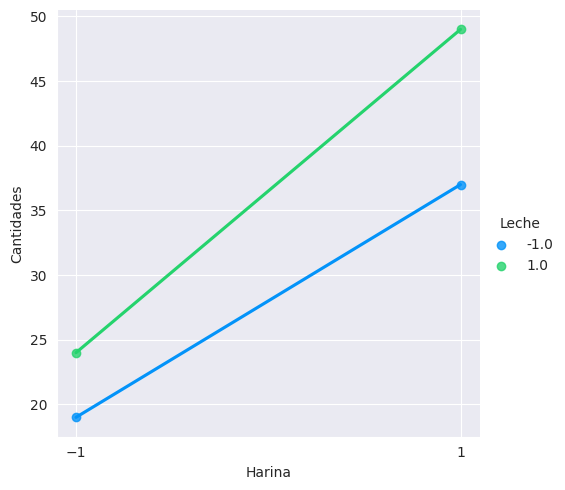

In [108]:
ax1 = sns.lmplot(data=experimento, x='Harina', y='Cantidades', ci=None, hue='Leche')
ax1.set(xticks=(-1,1))

### Para la Leche

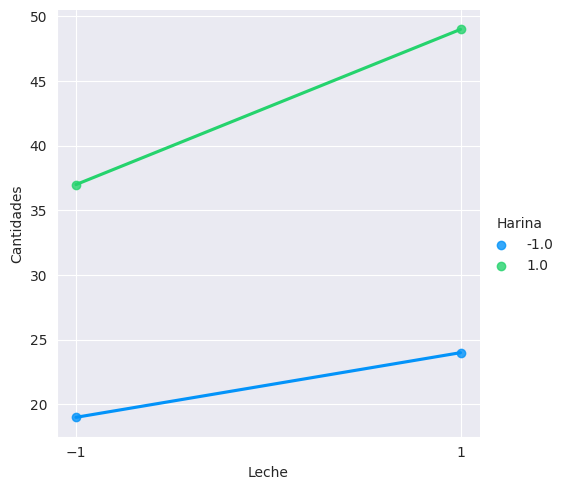

In [109]:
ax2 = sns.lmplot(data=experimento, x='Leche', y='Cantidades', ci=None, hue='Harina')
ax2.set(xticks=(-1,1))

# <font color = 'purple'> Ajustando el modelo estadístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

### Bibliotecas  Stats Model


In [110]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

**$P = XHarina + YLeche + XHarina * YLeche$**

**$P = B0 + B1*XHarina + B2*YLeche + B3*XHarina*YLeche + E$**

**Donde:**

* **$B0$** = Interceptor
* **$B1*XHarina + B2*YLeche$** = Efectos aislados
* **$B3*XHarina*YLeche$** = Efectos de interaccion
* **$E$** = Error

In [111]:
modelo = smf.ols(data=experimento, formula='Cantidades ~ Harina + Leche + Harina:Leche')

In [112]:
modelo_ajustado = modelo.fit()

In [113]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                nan
Time:                        06:17:58   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.2500        nan        nan   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw =

# <font color = 'purple'> Aumentando los Grados de libertad  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Réplicas en el centro</b>

<p style='margin: 30px 30px;'>
    
    

    

    
<hr>    

In [114]:
centro = np.array([
    [0,0,29],
    [0,0,30],
    [0,0,29],
    [0,0,30]
])

In [115]:
centro_df = pd.DataFrame(centro, columns=['Harina','Leche','Cantidades'], index=[4,5,6,7])

In [116]:
centro_df

,Harina,Leche,Cantidades
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [117]:
experimento = experimento.append(centro_df)

<ipython-input-117-4db880f150ed>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  experimento = experimento.append(centro_df)


In [118]:
experimento

,Harina,Leche,Cantidades
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análisis de significancia estadística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [119]:
modelo = smf.ols(data=experimento, formula='Cantidades ~ Harina + Leche + Harina:Leche')

In [120]:
modelo_ajustado = modelo.fit()

In [121]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Sat, 25 Nov 2023   Prob (F-statistic):            0.00152
Time:                        06:17:59   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.8750      0.710     43.494   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



# <font color = 'purple'> Prueba de significación estadística usando <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





In [122]:
t_valores = modelo_ajustado.tvalues

In [123]:
t_valores

Intercept       43.494275
Harina          10.708252
Leche            4.233495
Harina:Leche     1.743204
dtype: float64

In [124]:
nombres = t_valores.index.tolist()

In [125]:
nombres

['Intercept', 'Harina', 'Leche', 'Harina:Leche']

### .

In [126]:
from scipy import stats

In [127]:
distribucion = stats.t(df= 4)

In [128]:
distribucion.ppf(q= 1 - 0.025)

2.7764451051977987

In [129]:
limite = [distribucion.ppf(q= 1 - 0.025)]*len(nombres)

In [130]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### .


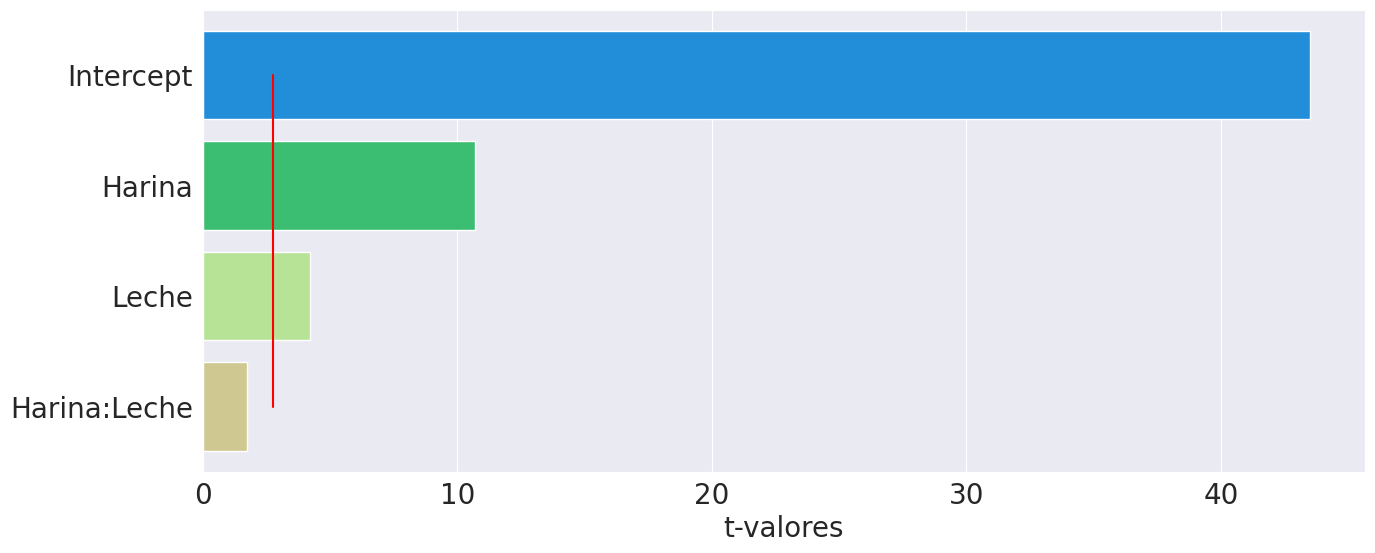

In [131]:
pareto = sns.barplot(x=t_valores, y=nombres)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
pareto.plot(limite, nombres,'r');

# <font color = 'purple'> Proponiendo un nuevo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [132]:
modelo_2 = smf.ols(data=experimento, formula='Cantidades ~ Harina + Leche')

In [133]:
modelo_ajustado_2 = modelo_2.fit()

In [134]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           0.000571
Time:                        06:17:59   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Diagrama de Pareto estandarizado del nuevo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [135]:
t_valores = modelo_ajustado_2.tvalues

In [136]:
t_valores

Intercept    36.658022
Harina        9.025173
Leche         3.568092
dtype: float64

In [137]:
nombres = t_valores.index.tolist()

In [138]:
nombres

['Intercept', 'Harina', 'Leche']

### .

In [139]:
distribucion = stats.t(df= 5)

In [140]:
distribucion.ppf(q= 1 - 0.025)

2.5705818366147395

In [141]:
limite = [distribucion.ppf(q= 1 - 0.025)]*len(nombres)

### Plotando el gráfico

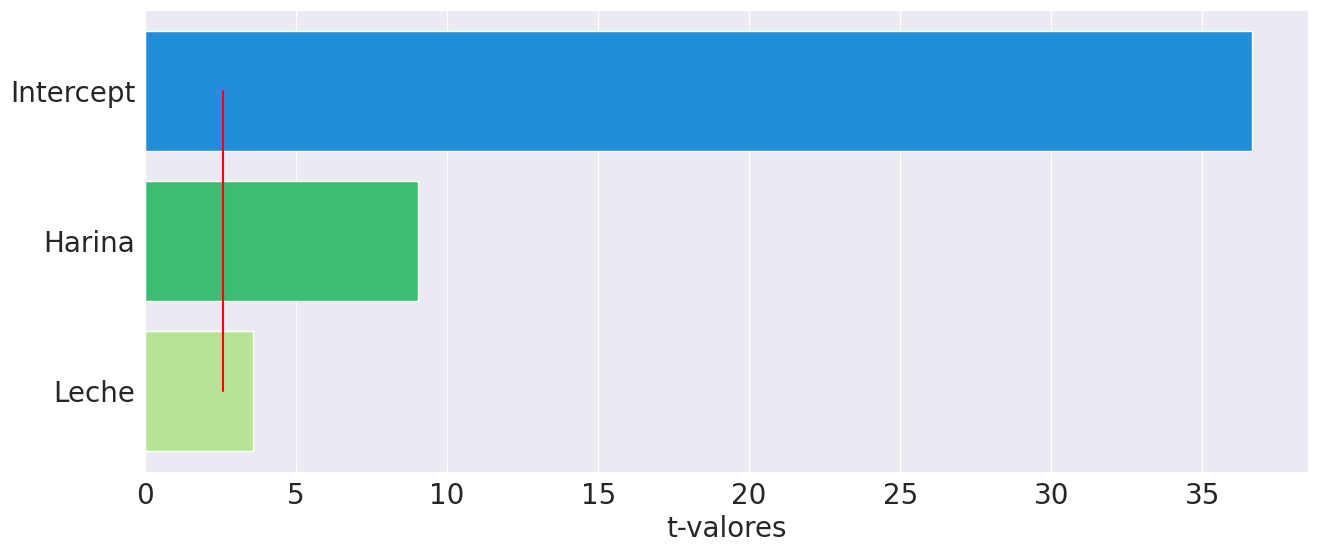

In [142]:
pareto = sns.barplot(x=t_valores, y=nombres)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
pareto.plot(limite, nombres,'r');

<font color='red' style='font-size: 30px;'> Predichos por observados  </font>
<hr style='border: 2px solid red;'>

In [143]:
observados = experimento['Cantidades']

In [144]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Cantidades, dtype: int64

### .

In [145]:
predicho = modelo_ajustado_2.predict()

In [146]:
predicho

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [147]:
import matplotlib.pyplot as plt

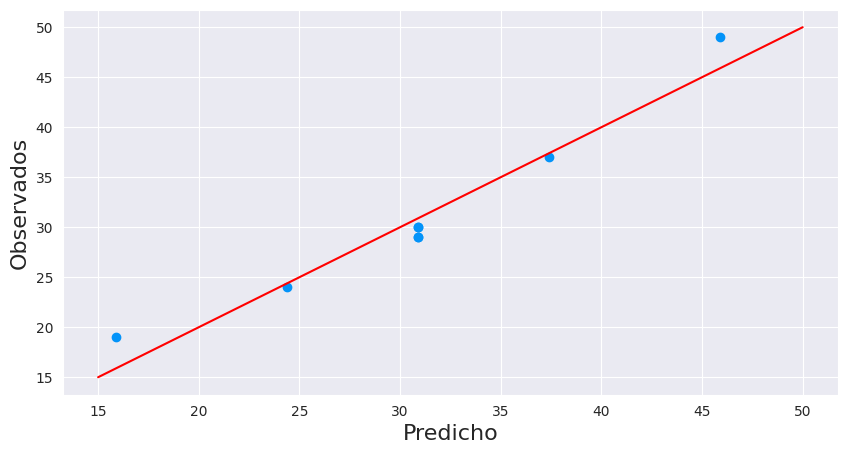

In [148]:
plt.figure(figsize=(10,5))
plt.xlabel('Predicho', fontsize=16)
plt.ylabel('Observados',fontsize=16)

#Linea de guia
x = np.linspace(start=15, stop=50, num=10)
y = np.linspace(start=15, stop=50, num=10)
plt.plot(x,y,'r')

# comparacion
plt.scatter(predicho, observados);

<hr>

In [149]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           0.000571
Time:                        06:18:00   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando el modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [150]:
parametros = modelo_ajustado_2.params

In [151]:
parametros

Intercept    30.875
Harina       10.750
Leche         4.250
dtype: float64

### .

### Definiendo la función

In [152]:
def modelo_receta(x_h,x_l):
  #limite
  limite_normalizado = [-1,+1]
  limite_harina = [0.5,1.5]
  limite_leche = [0.2,0.7]

  #conversion
  x_h_convertido = np.interp(x_h, limite_harina, limite_normalizado)
  x_l_convertido = np.interp(x_l, limite_leche, limite_normalizado)

  cantidades = parametros['Intercept'] + parametros['Harina']* x_h_convertido + + parametros['Leche']* x_l_convertido
  return round(cantidades)

In [153]:
modelo_receta(1.2,0.6)

38

# <font color = 'purple'> Mapa de colores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [154]:
x_harina = np.linspace(start=0.5, stop=1.5, num=10)
x_harina

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [155]:
x_leche = np.linspace(start=0.2, stop=0.7, num=10)
x_leche

array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
       0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ])

### .

In [156]:
puntos = []
for count1 in x_harina:
  temp=[]
  for count2 in x_leche:
    temp.append(modelo_receta(count1,count2))
  puntos.append(temp)

In [157]:
puntos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construyendo la superficie de respuesta

In [158]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

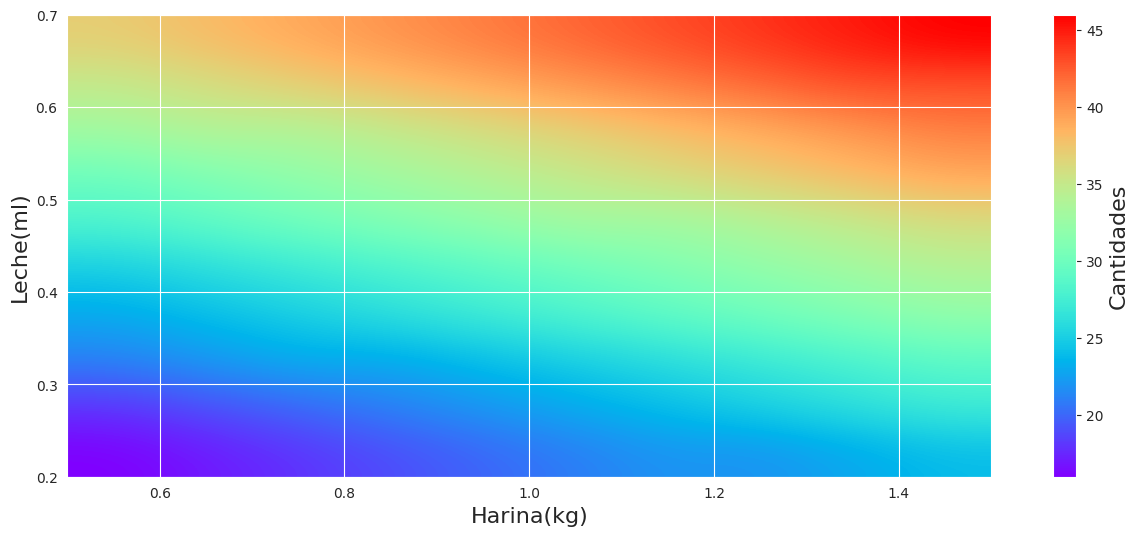

In [161]:
#base
plt.figure(figsize=(16,6))
plt.xlabel('Harina(kg)', fontsize=16)
plt.ylabel('Leche(ml)', fontsize=16)

#Mapa de colores
mapa_colores = plt.imshow(puntos, origin='lower', cmap=cm.rainbow, interpolation='quadric', extent=(0.5,1.5,0.2,0.7))

#Barra de color
plt.colorbar().set_label('Cantidades', fontsize=16)

<a list of 7 text.Text objects>

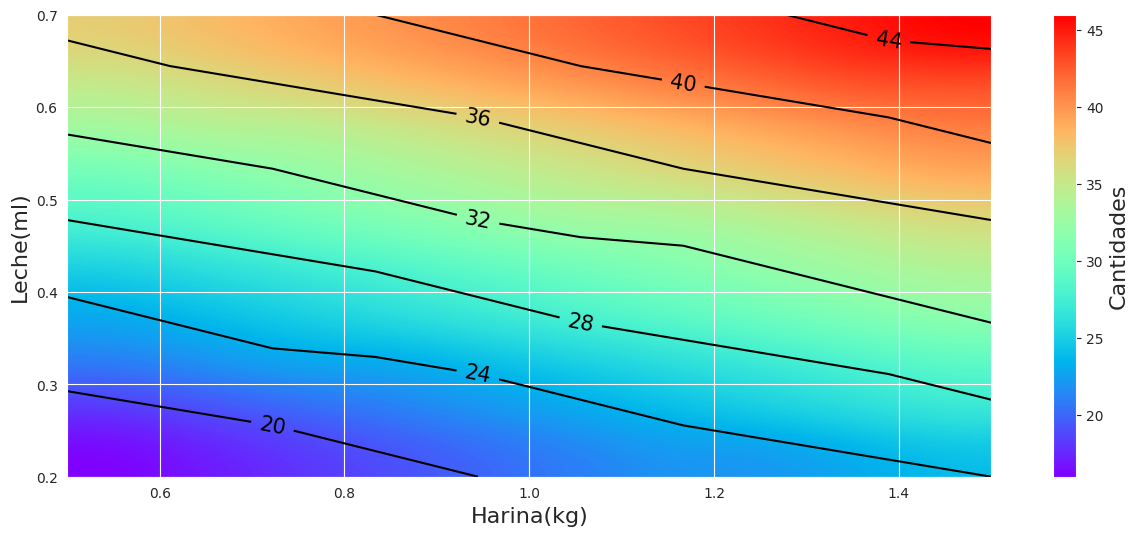

In [166]:
#base
plt.figure(figsize=(16,6))
plt.xlabel('Harina(kg)', fontsize=16)
plt.ylabel('Leche(ml)', fontsize=16)

#Mapa de colores
mapa_colores = plt.imshow(puntos, origin='lower', cmap=cm.rainbow, interpolation='quadric', extent=(0.5,1.5,0.2,0.7))

#Barra de color
plt.colorbar().set_label('Cantidades', fontsize=16)

#lineas
lineas = plt.contour(x_harina,x_leche,puntos, colors='k', linewidths=1.5)

#numeros
plt.clabel(lineas, inline=True, fmt='%1.0f', fontsize=15, inline_spacing=10)